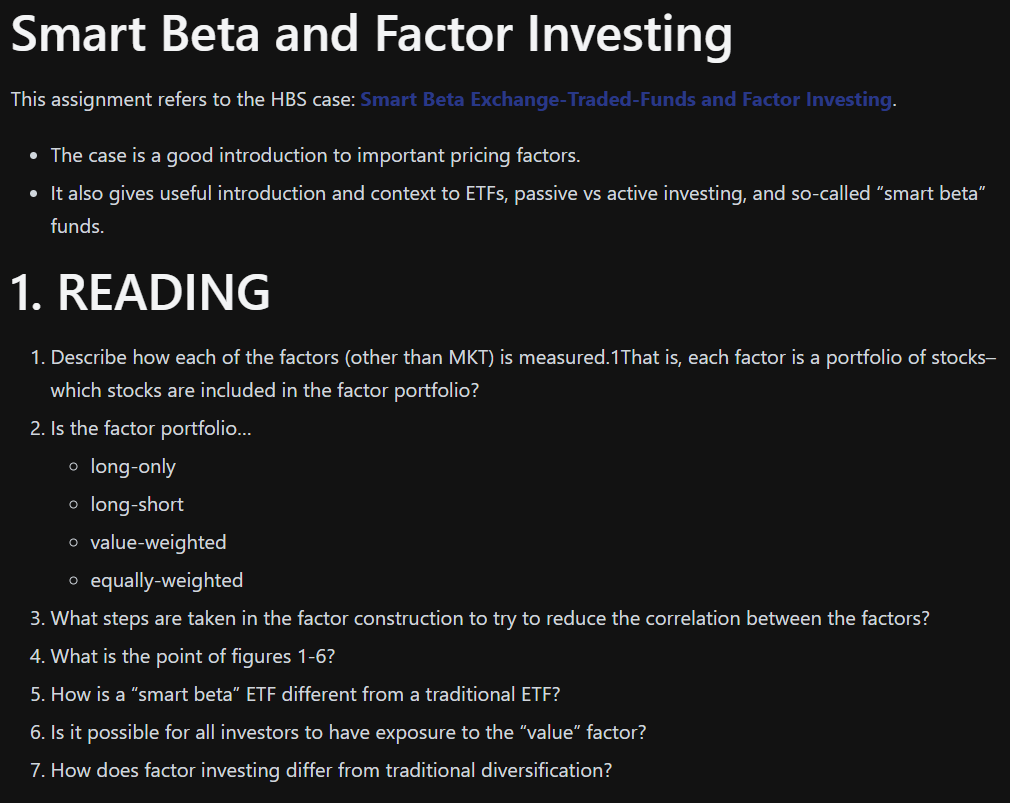

## 1.1

There are 5 other factors: SMB, HML, CMA, RMW, Momentum
1. SMB factor is constructed by going long on the lowest decile of stocks ordered by their market capitalization and going long on the top decile of stocks in the same ordering
2. HML factor portoflio is constructed by ordering the stocks on a Book to Market ratio of a fundamental variable derived from the stock owning company's balance sheet and income statement. We go long the top decile stocks and short the lowest decile stocks. This definition fits the name High Minus Low
3. CMA factor portfolio is constructed around the investment factor, stocks are ordered on the basis of the expenditure on the additional assets, we choose the lowest ranking decile stocks and go long on them while we go short on the highest spending decile stocks. This factor is called Conservative Minus Aggressive
4. RMW factor portfolio stands for Robust minus Weak. The profitability robustness is calculated and stocks are ordered and we go long on the top decile of this ordering and short the lowest decile.
5. Momentum factor portfolio is constructed by ordering the stocks on the basis of the returns made in the last year and then the top performers are gone long while we short the losers or the least performers. The rationale for this factor is that if things continue how they are right now, the winners will keep winning and losers will keep losing.

## 1.2
The Fama-French factor portfolios are long-short

## 1.3
We go long and short the stocks instead of going just long as this reduces the correlation to the mkt portfolio. (What else?)


## 1.4
In the figures 1-6, the relationship between the average return and the ordering of the stocks based on the factor criterion is shown. This helps us in understanding if there is a significant difference in the average returns if we categorize the stocks with the factor criterion.

## 1.5

Traditional ETF tracks an index where the weights of the stocks in the ETF are so that the tracking error is low and mostly the weights are market capitalization based. In Smart-beta ETFs we have weights to the stocks that depend on the factor construction methodology used, which depends on the fundamental value of the stock instead of just the Market Capitalization.

## 1.6
Yes, it is possible for all investor to have exposure to value factor, considering negative exposure is also exposure. If we consider only the positive exposure as having exposure, then it is not possible. This is because in the value factor construction we short growth stocks and go long value stocks, which means that someone has to take the opposite position in the stocks that we short.

## 1.7
Traditional diversification is done in terms of asset classes: equities, stocks, commodities etc.,. Historically, it has been noticed that there has been high co-variation of the returns of the asset classes. Whereas with factor investing, the correlation structure co-varies lesser when compared to the traditional diversification asset classes.

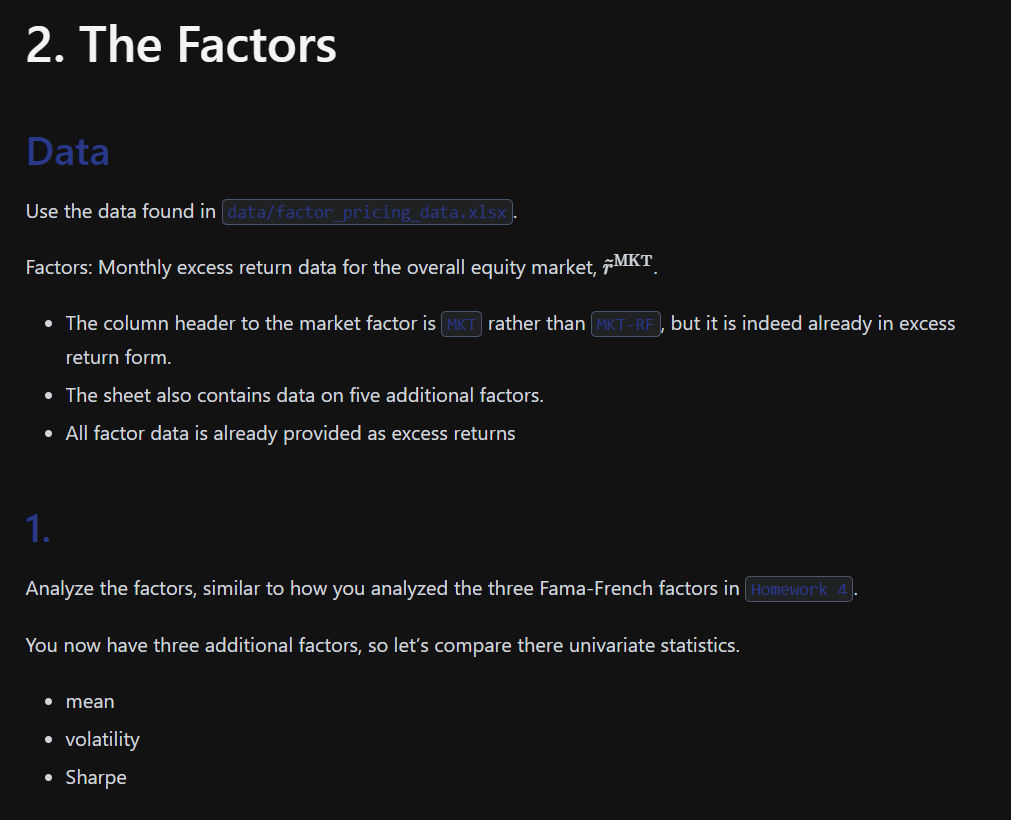

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fontTools.misc.plistlib import end_date

FILE_PATH = "FINM Portfolio/factor_pricing_data_monthly.xlsx"

data = pd.read_excel(FILE_PATH, sheet_name = 'factors (excess returns)', index_col = 'Date')

display(data)

,MKT,SMB,HML,RMW,CMA,UMD
Date,,,,,,
1980-01-31,0.0550,0.0188,0.0185,-0.0184,0.0189,0.0745
1980-02-29,-0.0123,-0.0162,0.0059,-0.0095,0.0292,0.0789
1980-03-31,-0.1289,-0.0697,-0.0096,0.0182,-0.0105,-0.0958
1980-04-30,0.0396,0.0105,0.0103,-0.0218,0.0034,-0.0048
1980-05-31,0.0526,0.0200,0.0038,0.0043,-0.0063,-0.0118
...,...,...,...,...,...,...
2025-04-30,-0.0084,-0.0186,-0.0340,-0.0285,-0.0267,0.0497
2025-05-31,0.0606,-0.0072,-0.0288,0.0126,0.0251,0.0221
2025-06-30,0.0486,-0.0002,-0.0160,-0.0319,0.0145,-0.0264


In [2]:
# factors = [col for col in data.columns if col not in ['MKT']]

FREQ = 12

def univariateStatistics(data, start_date = None, end_date = None, FREQ = 52) -> pd.DataFrame:

    # Todo: code to calculate freq based on the data
    if start_date is None:
        start_date = data.index[0]
    if end_date is None:
        end_date = data.index[-1] + pd.Timedelta(days = 1)

    data = data.loc[start_date:end_date]
    cols = data.columns
    stats = ['Mean', 'Volatility', 'Sharpe']
    stats_dict = {stat: [] for stat in stats}
    for col in cols:
        col_mean = data[col].mean() * FREQ
        col_vol = data[col].std() * np.sqrt(FREQ)
        col_SR = col_mean/col_vol
        stats_dict['Mean'].append(col_mean)
        stats_dict['Volatility'].append(col_vol)
        stats_dict['Sharpe'].append(col_SR)

    stats_df = pd.DataFrame(stats_dict, index = cols)
    return stats_df

overall_stats_df = univariateStatistics(data, FREQ = FREQ)
display(overall_stats_df)

,Mean,Volatility,Sharpe
MKT,0.087552,0.156142,0.560718
SMB,0.006120,0.101274,0.060435
HML,0.026039,0.108835,0.239249
RMW,0.044047,0.082931,0.531132
CMA,0.028288,0.072480,0.390284
UMD,0.060313,0.153352,0.393299


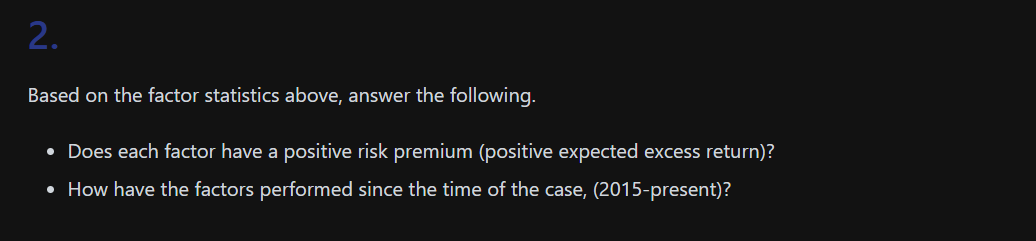

In [3]:
import time
start_date = data.index[0].strftime("%Y-%m-%d")
end_date = data.index[-1].strftime("%Y-%m-%d")

print(start_date, end_date)

start_date2015 = pd.Timestamp(2015, 1, 1)
sub_stats_df = univariateStatistics(data, start_date = start_date2015, FREQ = FREQ)

display(sub_stats_df)


1980-01-31 2025-08-31


,Mean,Volatility,Sharpe
MKT,0.117872,0.157356,0.749078
SMB,-0.023775,0.103166,-0.230455
HML,-0.016303,0.129885,-0.125520
RMW,0.040012,0.072632,0.550896
CMA,-0.009141,0.082072,-0.111373
UMD,0.020119,0.137387,0.146438


## 2.2

### 2.2.1
Yes, all factors have positive risk premium when looked into the entire period. (1980-01-31 to 2025-08-31)
### 2.2.2
Looking at the 2015-present data, we can say that the factors SMB, HML, CMA have lost their premiums. MKT factor is the best factor with the highest annualized return of 51%

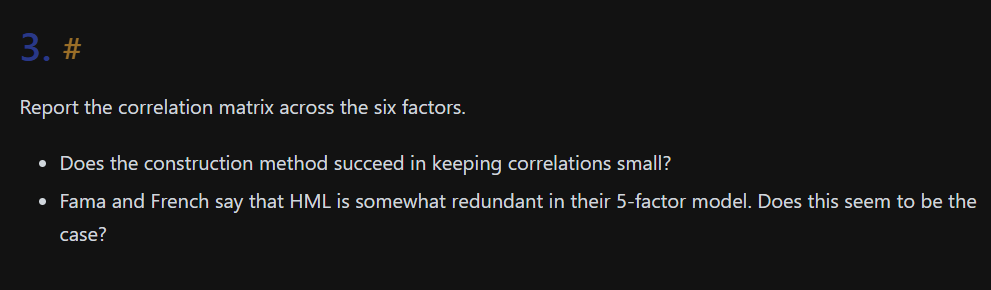

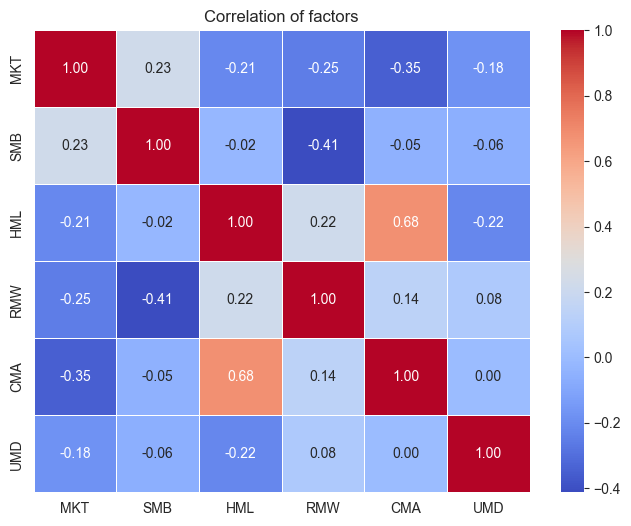

In [4]:
# calculating the correlation of the entire time series of returns
corr = data.corr()
title = 'Correlation of factors'
def correlationPlot(data, title = 'Correlation Matrix'):
    corr = data.corr()
    plt.figure(figsize=(8, 6)) # Adjust figure size as needed
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(title)
    plt.show()

correlationPlot(data, title = title)


### 2.3. 1
The correlation is low with the exception of HML vs CMA. So, the five factor model hasn't succeeded in keeping the correlation structure.

### 2.3.2
It looks as if the HML factor is not required given the five factor model as the correlation of HML is high to CMA.

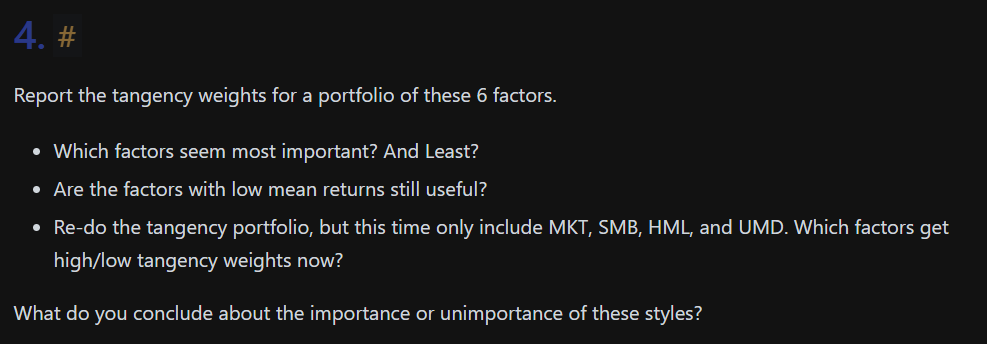

In [5]:
def calculateTangencyWeights(data):
    mean = data.mean()
    cov = data.cov()

    tangency_weights = np.linalg.solve(cov, mean)
    tangency_weights = tangency_weights / sum(tangency_weights)

    return tangency_weights

tangency_weights = calculateTangencyWeights(data)
means = data.mean() * FREQ

visual_df = pd.DataFrame({
    'Tangency Weight': tangency_weights,
    'Expected Return': means }, index = data.columns)

display(visual_df.style.format({
    'Tangency Weight': '{:.2f}',
    'Expected Return': '{:.3f}'
}))

,Tangency Weight,Expected Return
MKT,0.22,0.088
SMB,0.07,0.006
HML,-0.02,0.026
RMW,0.30,0.044
CMA,0.32,0.028
UMD,0.11,0.060


In [6]:
# factors to consider MKT, SMB, HML, UMD
factors = ['MKT', 'SMB', 'HML', 'UMD']
sub_data = data[factors]

sub_tangency_weights = calculateTangencyWeights(sub_data)
sub_means = sub_data.mean() * FREQ
sub_visual_df = pd.DataFrame({
    'Tangency Weight': sub_tangency_weights,
    'Expected Return': sub_means
})

display(sub_visual_df.style.format({
    'Tangency Weight': '{:.2f}',
    'Expected Return': '{:.3f}'
}))

,Tangency Weight,Expected Return
MKT,0.38,0.088
SMB,-0.05,0.006
HML,0.37,0.026
UMD,0.31,0.060


### 2.4.1
The most important factors are RMW and CMA while the least important factors are HML and SMB.

### 2.4.2
Yes, the factors with lower mean returns are useful as they help in diversification with their low or negative cross correlations.

### 2.4.3
With the proposed change in the factor set, SMB gets the lowest absolute weight. All other factors MKT, HML and UMD get weight higher than 0.3 (30%)

## Conclusion (about the styles)

With the above analysis,
1. the HML factor's high correlation with CMA factor and lower returns compared to the CMA factor tells us about the ineffectiveness of the factor in this model
2. the correlation structure among the other factors is good and helps in diversification.

In [7]:
import statsmodels.api as sm

equity_portfolio_data = pd.read_excel(FILE_PATH, sheet_name = 'portfolios (excess returns)', index_col = 'Date')

# y = equity_portfolio_data['Agric']
# X = sm.add_constant(data)
#
# model = sm.OLS(y, X).fit()


def calculateRegressionStatistics(X, y):
    model = sm.OLS(y, X).fit()
    alpha = model.params.iloc[0]
    r_squared_ = model.rsquared
    params = model.params
    return {'alpha': alpha, 'r-squared': r_squared_, 'params': params}

sectors = equity_portfolio_data.columns

sector_data = {sector: {} for sector in sectors}

alphas = []
r_squared = []
for sector in sectors:
    y = equity_portfolio_data[sector] * FREQ
    X = sm.add_constant(data) * FREQ
    sector_regression_stats = calculateRegressionStatistics(X, y)
    sector_data[sector] = sector_regression_stats
    alphas.append(sector_regression_stats['alpha'])
    r_squared.append(sector_regression_stats['r-squared'])

AQR_visual_df2 = pd.DataFrame({
    'alpha': alphas,
    'r-squared': r_squared,
}, index = sectors)

display(AQR_visual_df2.style.format({
    'alpha': '{:.2f}',
    'r-squared': '{:.3f}'
}))

,alpha,r-squared
Agric,0.00,0.364
Food,-0.00,0.478
Soda,0.00,0.311
Beer,-0.00,0.436
Smoke,0.00,0.296
Toys,-0.00,0.563
Fun,0.00,0.616
Books,-0.00,0.706
Hshld,-0.00,0.582
Clths,-0.00,0.646


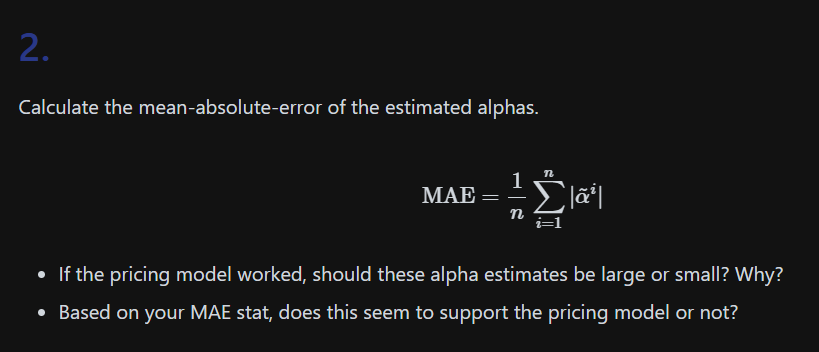

In [8]:
AQR_MAE = sum([abs(val) for val in AQR_visual_df2['alpha']]) / len(AQR_visual_df2)
print("MAE for AQR model: ", round(AQR_MAE, 3))

MAE for AQR model:  0.002


THe MAE stats supports the pricing model

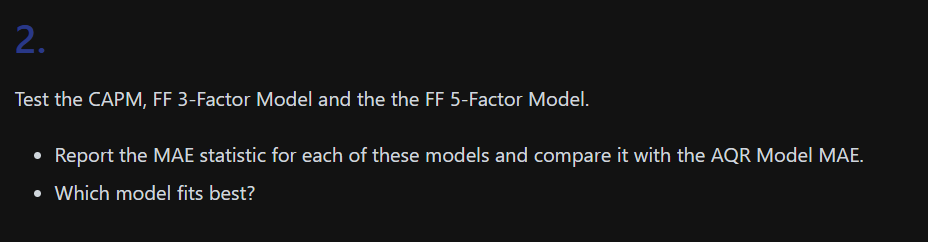

In [9]:
FF3_factor_set = ['MKT', 'SMB', 'HML']
FF5_factor_set = FF3_factor_set + ['RMW', 'CMA']

def alphasRSquaredData(portfolio_data, factor_data, FREQ = 52):
    X = sm.add_constant(factor_data) * FREQ

    cols = portfolio_data.columns
    alphas = []
    r_squared = []

    for col in cols:
        y = portfolio_data[col] * FREQ
        model = sm.OLS(y, X).fit()

        alphas.append(model.params.iloc[0])
        r_squared.append(model.rsquared)

    return alphas, r_squared

FF3_alphas, FF3_rsquared = alphasRSquaredData(equity_portfolio_data, data[FF3_factor_set], FREQ = FREQ)
FF5_alphas, FF5_rsquared = alphasRSquaredData(equity_portfolio_data, data[FF5_factor_set], FREQ = FREQ)

FF3_visual_df = pd.DataFrame({
    'alpha': FF3_alphas,
    'r-squared': FF3_rsquared,
}, index = equity_portfolio_data.columns)
FF5_visual_df = pd.DataFrame({
    'alpha': FF5_alphas,
    'r-squared': FF5_rsquared,
}, index = equity_portfolio_data.columns)

FF3_MAE = sum([abs(val) for val in FF3_visual_df['alpha']]) / len(FF3_visual_df)
FF5_MAE = sum([abs(val) for val in FF5_visual_df['alpha']]) / len(FF5_visual_df)


MAE_df = pd.DataFrame({'AQR': [AQR_MAE], 'FF3': [FF3_MAE], 'FF5': [FF5_MAE]}, index = ['MAE'])
display(MAE_df.style.format({
    'AQR': '{:.4f}',
    'FF3': '{:.4f}',
    'FF5': '{:.4f}'
}))

,AQR,FF3,FF5
MAE,0.0024,0.0020,0.0026


Out of the 3 models, FF3 has the least MAE, and fits the best

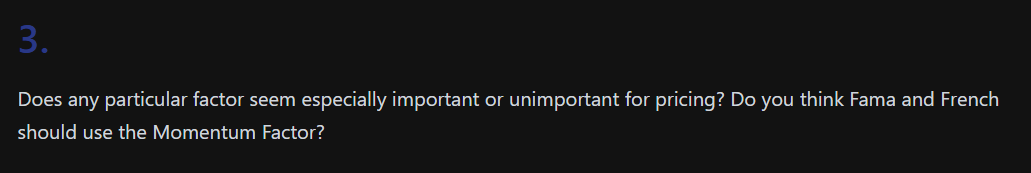

In [10]:
display(FF3_visual_df.style.format({
    'alphas':'{:.4f}',
    'r-squared':'{:.4f}',
}))

display(FF5_visual_df.style.format({
    'alphas':'{:.4f}',
    'r-squared':'{:.4f}',
}))

,alpha,r-squared
Agric,0.001663,0.3573
Food,0.002391,0.4041
Soda,0.002658,0.2734
Beer,0.003815,0.3518
Smoke,0.005774,0.2312
Toys,-0.002912,0.5305
Fun,0.001005,0.5952
Books,-0.002859,0.6911
Hshld,0.001037,0.5043
Clths,-0.000871,0.5739


,alpha,r-squared
Agric,0.000597,0.3619
Food,-0.000535,0.4781
Soda,-0.000141,0.3064
Beer,0.000342,0.4336
Smoke,0.001709,0.2944
Toys,-0.005240,0.5509
Fun,0.002012,0.5995
Books,-0.004070,0.7022
Hshld,-0.002043,0.5819
Clths,-0.003749,0.6291


In [11]:
FF3_with_Momentum = FF3_factor_set + ['UMD']
FF5_with_Momentum = FF5_factor_set + ['UMD']

FF3_Mom_alphas, FF3_Mom_rsquared = alphasRSquaredData(equity_portfolio_data, data[FF3_with_Momentum], FREQ = FREQ)
FF5_Mom_alphas, FF5_Mom_rsquared = alphasRSquaredData(equity_portfolio_data, data[FF5_with_Momentum], FREQ = FREQ)

FF3_Mom_visual_df = pd.DataFrame({
    'alpha': FF3_Mom_alphas,
    'r-squared': FF3_Mom_rsquared,
}, index = equity_portfolio_data.columns)
FF5_Mom_visual_df = pd.DataFrame({
    'alpha': FF5_Mom_alphas,
    'r-squared': FF5_Mom_rsquared,
}, index = equity_portfolio_data.columns)

FF3_Mom_MAE = sum([abs(val) for val in FF3_Mom_visual_df['alpha']]) / len(FF3_Mom_visual_df)
FF5_Mom_MAE = sum([abs(val) for val in FF5_Mom_visual_df['alpha']]) / len(FF5_Mom_visual_df)


Mom_MAE_df = pd.DataFrame({
    'AQR': [AQR_MAE],
    'FF3': [FF3_MAE],
    'FF5': [FF5_MAE],
    'FF3 + Momentum': [FF3_Mom_MAE],
    'FF5 + Momentum': [FF5_Mom_MAE]
}, index = ['MAE'])

display(Mom_MAE_df.style.format({
    'AQR': '{:.4f}',
    'FF3': '{:.4f}',
    'FF5': '{:.4f}'
}))

,AQR,FF3,FF5,FF3 + Momentum,FF5 + Momentum
MAE,0.0024,0.0020,0.0026,0.001850,0.002367


Adding the momentum factor to the FF3 and FF5 models increases the performance, which implies that Momentum should be added to the factor set.



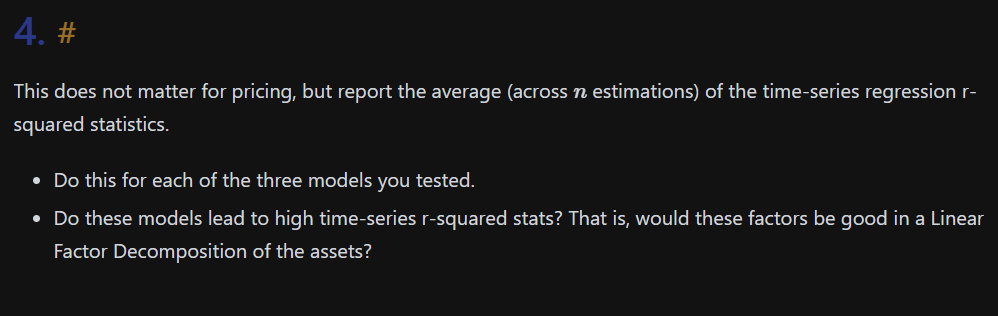

In [12]:
AQR_rsquared = AQR_visual_df2['r-squared'].to_list()

AQR_avg_rsquared = sum(AQR_rsquared) / len(AQR_rsquared)
FF3_avg_rsquared = sum(FF3_rsquared) / len(FF3_rsquared)
FF5_avg_rsquared = sum(FF5_rsquared) / len(FF5_rsquared)


avg_rsquared_df = pd.DataFrame({
    'AQR': [AQR_avg_rsquared],
    'FF3': [FF3_avg_rsquared],
    'FF5': [FF5_avg_rsquared],
}, index = ['avg_rsquared'])
avg_rsquared_df = avg_rsquared_df.round(2)
display(avg_rsquared_df.style.format({
    'AQR': '{:.2f}',
    'FF3': '{:.2f}',
    'FF5': '{:.2f}'
}))

,AQR,FF3,FF5
avg_rsquared,0.60,0.57,0.59


No model has a rsquared greater than 0.6, which means none of them are able to explain more than 40% of variance in the data. This means they are not good for Linear Factor Decomposition of assets


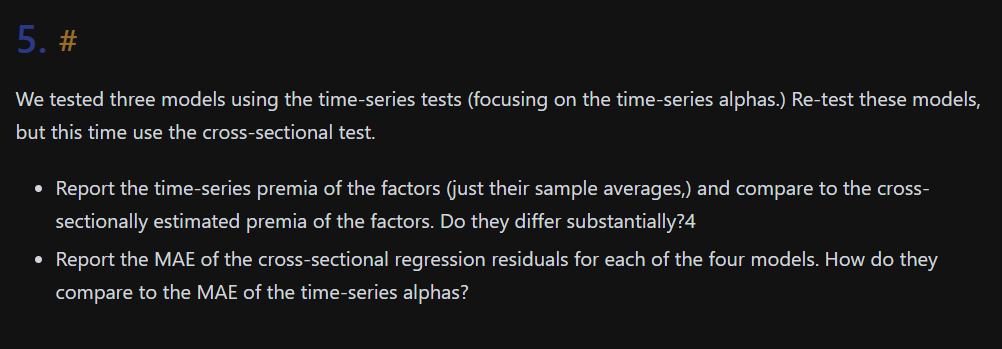
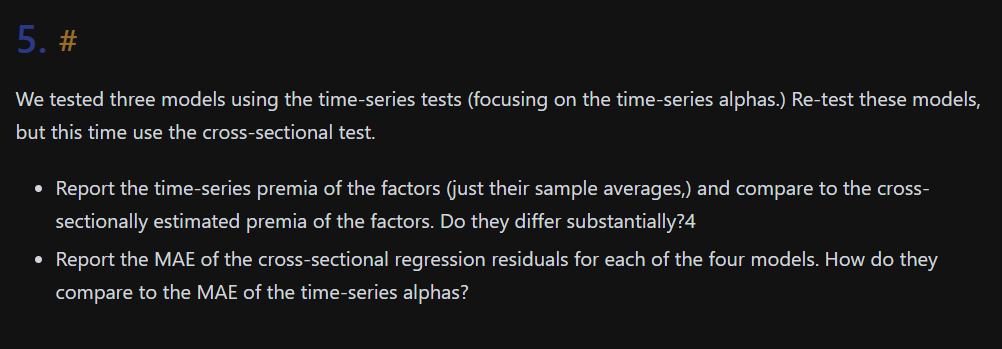

In [13]:
# time series risk premia
TS_risk_premia = data.mean()*FREQ

assets_mean_excess_returns = equity_portfolio_data.mean()*FREQ

factor_sets = {'AQR': ['MKT', 'SMB', 'HML', 'UMD'],
               'FF3': ['MKT', 'SMB', 'HML'],
               'FF5': ['MKT', 'SMB', 'HML', 'RMW', 'CMA'],
               'ALL': ['MKT', 'SMB', 'HML', 'RMW', 'CMA', 'UMD']}

model_params = {FM: [] for FM in factor_sets.keys()}
sectors = equity_portfolio_data.columns
for FM, factor_set in factor_sets.items():
    X = sm.add_constant(data[factor_set]) * FREQ
    for sector in sectors:
        y = equity_portfolio_data[sector] * FREQ
        model = sm.OLS(y,X).fit()
        model_params[FM].append(model.params)




In [14]:

CS_factor_risk_premia = {FM: None for FM in factor_sets.keys()}
for FM, model_params_list in model_params.items():
    X = sm.add_constant(pd.DataFrame(model_params_list).drop(['const'], axis=1))
    y = assets_mean_excess_returns
    X = X.set_index(y.index)
    model = sm.OLS(y,X).fit()
    model.params = model.params.rename(FM)
    CS_factor_risk_premia[FM] = model.params





In [15]:
TS_risk_premia = TS_risk_premia.rename('Time Series Risk Premia')
risk_premia_comparision_df = pd.DataFrame([TS_risk_premia] + list(CS_factor_risk_premia.values())).fillna(0)

display(risk_premia_comparision_df.round(3))

,MKT,SMB,HML,RMW,CMA,UMD,const
Time Series Risk Premia,0.088,0.006,0.026,0.044,0.028,0.060,0.000
AQR,0.038,-0.040,-0.021,0.000,0.000,-0.003,0.064
FF3,0.039,-0.040,-0.021,0.000,0.000,0.000,0.063
FF5,0.040,-0.041,-0.026,0.019,-0.022,0.000,0.060
ALL,0.040,-0.041,-0.026,0.019,-0.022,-0.001,0.060


Yes, the risk premia estimated using the time series and cross section vary significantly. This tells us that the LFMs fail.


In [16]:
# MAE calculation
CS_MAE = {FM: None for FM in factor_sets.keys()}
def calculateMAE(series):
    return sum([abs(val) for val in series])/len(series)
for FM, model_params_list in model_params.items():
    X = sm.add_constant(pd.DataFrame(model_params_list).drop(['const'], axis=1))
    y = assets_mean_excess_returns
    X = X.set_index(y.index)
    model = sm.OLS(y,X).fit()
    model.params = model.params.rename(FM)
    # CS_MAE[FM] = calculateMAE(model.resid + model.params.iloc[0])
    CS_MAE[FM] = calculateMAE(model.resid)

MAE_comparison_df = pd.DataFrame({
    FM: [CS_MAE[FM]] for FM in factor_sets.keys()
}, index = ["Cross Section MAE"])

In [17]:
display(MAE_comparison_df.round(3))

,AQR,FF3,FF5,ALL
Cross Section MAE,0.012,0.012,0.012,0.012


In [18]:
MAE_df['ALL'] = None
MAE_comparison_df2 = pd.concat([MAE_comparison_df, MAE_df], axis = 0)

C:\Users\tanzi\AppData\Local\Temp\ipykernel_41996\3335571814.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  MAE_comparison_df2 = pd.concat([MAE_comparison_df, MAE_df], axis = 0)


In [19]:
display(MAE_comparison_df2)

,AQR,FF3,FF5,ALL
Cross Section MAE,0.012026,0.012002,0.011979,0.011988
MAE,0.002367,0.002030,0.002614,NaN
